# Lektion 5 - 2025-09-08

Inläsning av data till DataFrame på ett mer skalbart sätt

In [17]:
import pandas as pd

In [18]:
data = "C:/VScode projects/Lektion1/employees.csv"

Läs in en rad för att få en snabb överblick över kolumner och datat

In [19]:
df_inspect = pd.read_csv(data, nrows=1)
df_inspect

,First Name,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,8/6/1993,12:42 PM,97308,6.945,True,Marketing


Efter att ha inspekterat våran csv-fil skapar vi en dictionary där vi mappar datatyperna som vi vill ha dom

In [20]:
schema = {
    "First Name": {"dtype": "string"},
    "Start Date": {"dtype": "datetime64[ns]"},
    "Last Login Time": {"dtype": "string"},
    "Salary": {"dtype": "Int64"},
    "Bonus %": {"dtype": "float"},
    "Senior Management":{"dtype": "boolean"},
    "Team": {"dtype": "string"},
}

Läs in fullständiga csv-filen till ett DF

In [21]:
df = pd.read_csv(data)

Loopa igenom 'schema' dictionaryt och konvertera alla kolumner enligt vårat dictionary

In [25]:
for col, datatype in schema.items():
    if col not in df.columns:
        continue

    dtype = datatype.get("dtype")

    if "datetime" in dtype:
        df[col] = pd.to_datetime(df[col], format="%m/%d/%Y", errors="coerce")
    else:
        df[col] = df[col].astype(dtype, errors="ignore")

Validering

In [29]:
df.dtypes

First Name           string[python]
Start Date           datetime64[ns]
Last Login Time      string[python]
Salary                        Int64
Bonus %                     float64
Senior Management           boolean
Team                 string[python]
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    string        
 1   Start Date         1000 non-null   datetime64[ns]
 2   Last Login Time    1000 non-null   string        
 3   Salary             1000 non-null   Int64         
 4   Bonus %            1000 non-null   float64       
 5   Senior Management  933 non-null    boolean       
 6   Team               957 non-null    string        
dtypes: Int64(1), boolean(1), datetime64[ns](1), float64(1), string(3)
memory usage: 49.9 KB


Vi vill också byta namn på kolumnerna, på samma sätt här mappar vi det i ett dictionary

In [27]:
rename_map = {
    "First Name": "first_name",
    "Start Date": "start_date",
    "Last Login Time": "last_login_time",
    "Salary": "salary_usd",
    "Bonus %": "bonus_pct",
    "Senior Management": "senior_management",
    "Team": "team",
}

In [28]:
print(rename_map)  # kolla så det ser bra ut

{'First Name': 'first_name', 'Start Date': 'start_date', 'Last Login Time': 'last_login_time', 'Salary': 'salary_usd', 'Bonus %': 'bonus_pct', 'Senior Management': 'senior_management', 'Team': 'team'}


Applicera våran rename_map dict med .rename()

In [9]:
df = df.rename(columns=rename_map)

Validera

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_name         933 non-null    string        
 1   start_date         1000 non-null   datetime64[ns]
 2   last_login_time    1000 non-null   string        
 3   salary_usd         1000 non-null   Int64         
 4   bonus_pct          1000 non-null   float64       
 5   senior_management  933 non-null    boolean       
 6   team               957 non-null    string        
dtypes: Int64(1), boolean(1), datetime64[ns](1), float64(1), string(3)
memory usage: 49.9 KB


För att minska antalet körda celler kan vi göra allt i en och samma funktion

In [11]:
def apply_schema(df: pd.DataFrame, schema: dict, rename_map: dict) -> pd.DataFrame:
    # datatypes
    for col, datatype in schema.items():
        if col not in df.columns:
            continue

        dtype = datatype.get("dtype", None)
        if dtype and "datetime" in dtype:
            df[col] = pd.to_datetime(df[col], format="%m/%d/%Y", errors="coerce")
        elif dtype:
            df[col] = df[col].astype(dtype, errors="ignore")

    # rename
    if rename_map:
        df = df.rename(columns=rename_map)
    return df

Läs in det fullständiga datat på nytt

In [12]:
df = pd.read_csv(data)

Eftersom våran funktion returnerar "df" så kan vi köra funktionen och lagra resultatet i variabeln "df".

Vi ger bara våran ursprungliga df, schema är våran dict med datatyper, rename_map är våran dict med kolumnnamn

In [13]:
df = apply_schema(df, schema, rename_map)

Validera

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_name         933 non-null    string        
 1   start_date         1000 non-null   datetime64[ns]
 2   last_login_time    1000 non-null   string        
 3   salary_usd         1000 non-null   Int64         
 4   bonus_pct          1000 non-null   float64       
 5   senior_management  933 non-null    boolean       
 6   team               957 non-null    string        
dtypes: Int64(1), boolean(1), datetime64[ns](1), float64(1), string(3)
memory usage: 49.9 KB


### Avancerade matematiska operationer (NumPy)

Exempel: Skapa en ny kolumn av **salary_usd** med logaritmisk skala

Med NumPy:

In [14]:
import numpy as np

Vi använder numpys inbyggda log() för att beräkna **salary_usd** i logaritmisk skala
- Kör optimerad C-kod under huven (snabbare)

In [15]:
df["salary_usd_log_np"] = np.log(df["salary_usd"])

Utan NumPy:

In [16]:
import math

Utan numpy behöver vi använda ren Python med math och loopa igenom kolumnen
- Långsammare (rad för rad)

In [17]:
df["salary_usd_log_apply"] = df["salary_usd"].apply(math.log)

Är resultatet samma? 'np.allclose()' returnerar True om två värden är nästan lika inom en viss tolerans, annars False.

In [18]:
np.allclose(df["salary_usd_log_apply"], df["salary_usd_log_np"])

True

Visualisering av prestandaskillnaden

In [19]:
import timeit
import matplotlib.pyplot as plt

In [20]:
# Antal iterationer vi vill mäta
repeats = [10, 100, 1000, 5000]

# Tomma listor
results_numpy = []
results_apply = []

# Kör timeit för att mäta prestandan och samla resultaten i listorna
for i in repeats:
    t_numpy = timeit.timeit(lambda: np.log(df["salary_usd"]), number=i)
    t_apply = timeit.timeit(lambda: df["salary_usd"].apply(math.log), number=i)
    results_numpy.append(t_numpy)
    results_apply.append(t_apply)



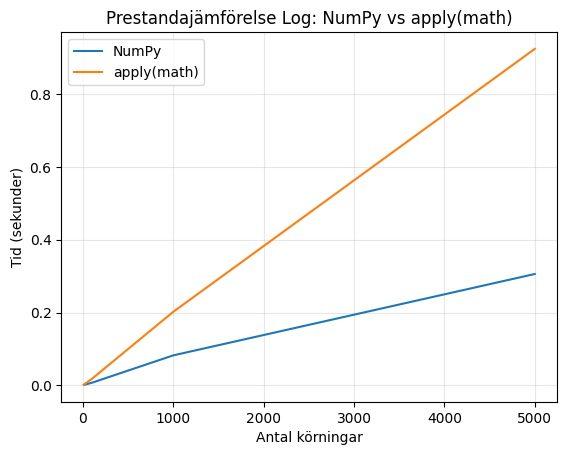

In [21]:
# Plotta resultaten från båda listor
plt.plot(repeats, results_numpy, label="NumPy") # numpy listan (results_numpy)
plt.plot(repeats, results_apply, label="apply(math)") # apply listan (results_apply)

# Titlar och labels
plt.xlabel("Antal körningar")
plt.ylabel("Tid (sekunder)")
plt.title("Prestandajämförelse Log: NumPy vs apply(math)")

# Lägg till en legend
plt.legend()

# Lägg till gridlines, sänkt alpha för diskretare linjer
plt.grid(True, alpha=0.3)

# Visa visualiseringen
plt.show()

Generera data med NumPy

In [22]:
# antal rader
n = 5_000_000

# generera tre kolumner med olika intervall
col1 = np.random.randint(0, 100, size=n)         # heltal 0–99
col2 = np.random.uniform(100, 1000, size=n)      # flyttal 100–1000
col3 = np.random.normal(loc=50, scale=10, size=n) # normalfördelning runt 50

Skapa ett DataFrame

In [23]:
df_rng = pd.DataFrame({
    "x": col1,
    "y": col2,
    "z": col3
})

In [24]:
df_rng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       int32  
 1   y       float64
 2   z       float64
dtypes: float64(2), int32(1)
memory usage: 95.4 MB


In [25]:
df_rng["y_log"] = np.log(df_rng["y"])

In [26]:
df_rng

,x,y,z,y_log
0,23,148.780518,46.193771,5.002472
1,38,593.117370,57.310601,6.385392
2,26,922.607439,63.985408,6.827204
3,67,957.661946,40.992071,6.864495
4,52,905.528019,44.732477,6.808518
...,...,...,...,...
4999995,39,106.910805,59.151872,4.671995
4999996,86,317.638085,51.896848,5.760913
4999997,97,258.733786,60.027834,5.555800
4999998,9,573.573600,41.750613,6.351886
